In [ ]:

!pip install tensorflow
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.6 MB/s eta 0:00:00


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=be134ae43241f1ae23a7899e7a44499a4854191366e7b780ccffbc9b1393c27b
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
import contractions
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import gensim
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from sklearn.metrics import classification_report
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/sample_data/categorized_new_tweets.csv')
test_data= pd.read_csv('/content/sample_data/Unseen 5pillarsEarthUK.csv',encoding='cp1252', quotechar='"', delimiter=',')

In [ ]:
# Count the number of tweets in each category
category_counts = train_data['category_name'].value_counts()

# Create a bar plot using plotly
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             labels={'x': 'Category Names', 'y': 'Number of Tweets'},
             title='Number of Tweets in Each Category',
             width=400, height=600)
# Show the plot
fig.show()

In [ ]:
# download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# get stop words
stop_words = set(stopwords.words('english'))
# create lemmatizer
lemmatizer = WordNetLemmatizer()


# define regular expression patterns for removing URLs, HTML tags, and emojis
#url_pattern = re.compile(r'http\S+|www\S+')
#html_pattern = re.compile('<.*?>')
#emoji_pattern = re.compile('[\U0001f600-\U0001f650]')

# define patterns for url, html tags, and emojis
url_pattern = re.compile(r'https?://\S+|www\.\S+')
html_pattern = re.compile(r'<.*?>')
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "they would have"
}

In [ ]:
# function to clean text and lemmatize text
def clean_tokenize_lemmatize(text):
    if isinstance(text, dict):
        text = text['full_text']
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove emojis using regex
    text = re.sub(r'[^\w\s,]', '', text)
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
    # expand contractions
    text = contractions.fix(text)
    
    # convert text to lowercase
    text = text.lower()
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return tokens

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# apply clean_text function to train data
train_data['text'] = train_data['full_text'].apply(clean_tokenize_lemmatize)

# apply clean_text function to test data
test_data['text'] = test_data['full_text'].apply(clean_tokenize_lemmatize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 27.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

import torch

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['category_name'], test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(9118,) (9118,)
(3908,) (3908,)


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


In [ ]:
#train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
train_encodings  = tokenizer.batch_encode_plus(
    [ ' '.join(text) for text in X_train.tolist() ],
    truncation=True,
    padding=True   
)
#val_encodings = tokenizer(list(X_val), truncation=True, padding=True)
val_encodings  = tokenizer.batch_encode_plus(
    [ ' '.join(text) for text in X_val.tolist() ],
    truncation=True,
    padding=True   
)

In [ ]:
# Convert labels to integers
label_map = {'non_persuasive': 0, 'soft_persuasion': 1, 'general_persuasion': 2, 'hard_persuasion': 3}
train_labels = [label_map[label] for label in y_train]
val_labels = [label_map[label] for label in y_val]

In [ ]:
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']),
                                               torch.tensor(train_encodings['attention_mask']),
                                               torch.tensor(train_labels))

val_dataset = torch.utils.data.TensorDataset(torch.tensor(val_encodings['input_ids']),
                                             torch.tensor(val_encodings['attention_mask']),
                                             torch.tensor(val_labels))


In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
#don't touch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

for epoch in range(5):
    for batch in train_loader:
        optim.zero_grad()
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optim.step()


In [ ]:

#new code for graph
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=50, shuffle=False)

optim = AdamW(model.parameters(), lr=5e-5)

# Lists to store the training loss and accuracy for each epoch
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs=5

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    epoch_train_loss = []
    epoch_train_acc = []
    #model.train()
    for batch in train_loader:
        optim.zero_grad()
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss#
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        acc = torch.sum(preds == batch[2]).item() / batch[2].shape[0]
        loss.backward()
        optim.step()
        epoch_train_acc.append(acc)
        epoch_train_loss.append(loss.item())
    train_loss = np.mean(epoch_train_loss)
    train_accuracy = np.mean(epoch_train_acc)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [ ]:
#don't touch
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=50, shuffle=False)

val_preds = []
with torch.no_grad():
    for batch in val_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        val_preds.extend(preds.cpu().numpy())
val_preds = [label for label in val_preds]

#print('Accuracy:', accuracy_score(y_val, val_preds))
#print('Classification Report:\n', classification_report(y_val, val_preds))


In [ ]:

model.eval()
#val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=50, shuffle=False)

val_preds = []
with torch.no_grad():
    epoch_val_loss = []
    epoch_val_acc = []
    for batch in val_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        acc = torch.sum(preds == batch[2]).item() / batch[2].shape[0]
        epoch_val_acc.append(acc)
        epoch_val_loss.append(loss.item())
    val_loss = np.mean(epoch_val_loss)
    val_accuracy = np.mean(epoch_val_acc)
    train_accuracies.append(val_loss)
    val_accuracies.append(val_accuracy)
# Print the training and validation loss and accuracy for this epoch
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


#print('Accuracy:', accuracy_score(y_val, val_preds))
#print('Classification Report:\n', classification_report(y_val, val_preds))


Train Loss: 0.2041, Train Accuracy: 0.9387, Val Loss: 0.3958, Val Accuracy: 0.9080


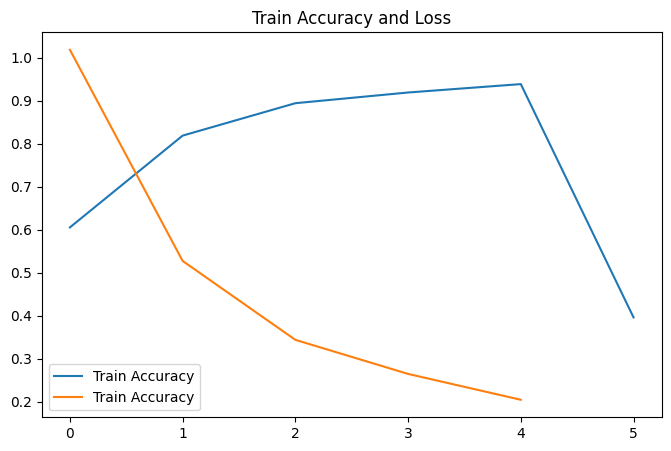

In [ ]:
# Plot the training and validation loss and accuracy for each epoch

fig, (ax1) = plt.subplots(1, figsize=(8, 5))

ax1.set_title('Train Accuracy and Loss')
ax1.plot(train_accuracies, label='Train Accuracy')
ax1.plot(train_losses, label='Train Accuracy')
ax1.legend()


plt.show()

Validation accuracy: 0.9081371545547595
Validation classification report:
                     precision    recall  f1-score   support

general_persuasion       0.94      0.89      0.91      1497
   hard_persuasion       0.90      0.94      0.92       494
    non_persuasive       0.91      0.93      0.92      1595
   soft_persuasion       0.77      0.84      0.80       322

          accuracy                           0.91      3908
         macro avg       0.88      0.90      0.89      3908
      weighted avg       0.91      0.91      0.91      3908



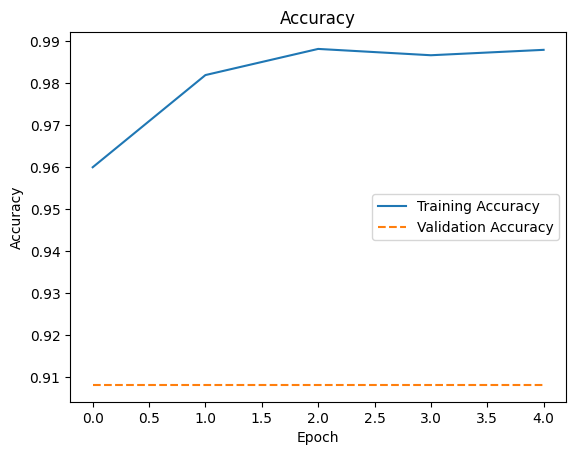

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []

for epoch in range(5):
    epoch_train_losses = []
    epoch_train_accs = []
    for batch in train_loader:
        optim.zero_grad()
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optim.step()
        
        # Calculate training accuracy for this batch
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        acc = accuracy_score(batch[2].cpu().numpy(), preds.cpu().numpy())
        
        epoch_train_losses.append(loss.item())
        epoch_train_accs.append(acc)
        
    # Calculate average loss and accuracy for this epoch
    avg_train_loss = sum(epoch_train_losses) / len(epoch_train_losses)
    avg_train_acc = sum(epoch_train_accs) / len(epoch_train_accs)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=50, shuffle=False)

val_preds = []
with torch.no_grad():
    for batch in val_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        val_preds.extend(preds.cpu().numpy())
val_preds = [label for label in val_preds]

# Convert predicted labels back to their original string labels
inv_label_map = {v: k for k, v in label_map.items()}
val_pred_labels = [inv_label_map[pred] for pred in val_preds]

# Convert val_preds to an array
val_preds_array = np.array(val_pred_labels)

# Calculate validation accuracy and print classification report
val_accuracy = accuracy_score(y_val, val_preds_array)
print(f'Validation accuracy: {val_accuracy}')

val_classification_report = classification_report(y_val, val_preds_array)
print('Validation classification report:\n', val_classification_report)

# Plot training loss and accuracy graphs
plt.plot(train_accs, label='Training Accuracy')
plt.plot([val_accuracy]*len(train_accs), linestyle='--', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Convert predicted labels back to their original string labels
inv_label_map = {v: k for k, v in label_map.items()}
val_pred_labels = [inv_label_map[pred] for pred in val_preds]

# Convert val_preds to an array
val_preds_array = np.array(val_pred_labels)

In [ ]:
# Calculate validation accuracy and print classification report
val_accuracy = accuracy_score(y_val, val_preds_array)
print(f'Validation accuracy: {val_accuracy}')

val_classification_report = classification_report(y_val, val_preds_array)
print('Validation classification report:\n', val_classification_report)


Validation accuracy: 0.9081371545547595
Validation classification report:
                     precision    recall  f1-score   support

general_persuasion       0.94      0.89      0.91      1497
   hard_persuasion       0.90      0.94      0.92       494
    non_persuasive       0.91      0.93      0.92      1595
   soft_persuasion       0.77      0.84      0.80       322

          accuracy                           0.91      3908
         macro avg       0.88      0.90      0.89      3908
      weighted avg       0.91      0.91      0.91      3908



Confusion Matrix:
 [[1327   44   89   37]
 [  13  463   15    3]
 [  62    5 1489   39]
 [   9    1   42  270]]


Text(0.5, 1.0, 'Confusion Matrix')

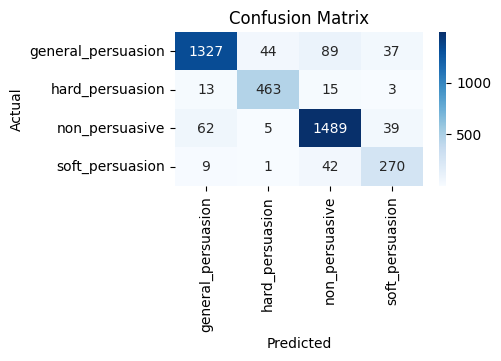

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Print confusion matrix
cm = confusion_matrix(y_val, val_preds_array)
print("Confusion Matrix:\n", cm)
# Compute and plot confusion matrix
conf_mat = confusion_matrix(y_val, val_preds_array)
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_data['category_name'].unique(),
            yticklabels=train_data['category_name'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

**Predicting unseen data**

In [ ]:
test_encodings = tokenizer.batch_encode_plus(
    [ ' '.join(text) for text in test_data['text'].tolist() ],
    truncation=True,
    padding=True   
)

In [ ]:
test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']),
                                             torch.tensor(test_encodings['attention_mask']))

In [ ]:
# Create a DataLoader for the test data
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=50, shuffle=False)


In [ ]:
# Make predictions on the test data
test_preds = []
with torch.no_grad():
    for batch in test_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        test_preds.extend(preds.cpu().numpy())

In [ ]:
# Convert predicted labels back to their original string labels
test_pred_labels = [inv_label_map[pred] for pred in test_preds]

# Convert test_preds to an array
test_preds_array = np.array(test_pred_labels)

# Export the predicted labels to a CSV file
test_data['category_name'] = test_preds_array
test_data.to_csv('RoBERTa_predictions.csv', index=False)